In [1]:
# !pip install adlfs
# !pip install fsspec==2022.3.0
# !pip install xarray==2022.3.0
# !pip install scipy
# ! pip install zarr
# !pip install netCDF4==1.6.1
import numpy as np

In [2]:
aoi_file =  '/Users/sean/metaearth/config/aoi/demo.json'

In [3]:
import json
import geopandas as gpd

In [4]:
aoi = gpd.read_file(aoi_file).unary_union

In [5]:
import pystac_client
import planetary_computer


catalog = pystac_client.Client.open(
    "https://planetarycomputer.microsoft.com/api/stac/v1"
)
gridmet = catalog.get_collection("gridmet")
asset = planetary_computer.sign(gridmet.assets["zarr-abfs"])
asset

<Asset href=abfs://gridmet/gridmet.zarr>

In [6]:
import fsspec
import xarray as xr

store = fsspec.get_mapper(asset.href, **asset.extra_fields["xarray:storage_options"])
ds = xr.open_zarr(store, **asset.extra_fields["xarray:open_kwargs"])

In [7]:
ds

<xarray.Dataset>
Dimensions:                                    (time: 15341, lat: 585,
                                                lon: 1386, crs: 1)
Coordinates:
  * crs                                        (crs) uint16 3
  * lat                                        (lat) float64 49.4 ... 25.07
  * lon                                        (lon) float64 -124.8 ... -67.06
  * time                                       (time) datetime64[ns] 1979-01-...
Data variables:
    air_temperature                            (time, lat, lon) float32 ...
    burning_index_g                            (time, lat, lon) float32 ...
    dead_fuel_moisture_1000hr                  (time, lat, lon) float32 ...
    dead_fuel_moisture_100hr                   (time, lat, lon) float32 ...
    mean_vapor_pressure_deficit                (time, lat, lon) float32 ...
    potential_evapotranspiration               (time, lat, lon) float32 ...
    precipitation_amount                       (time, lat, lon) float32 ...
    relative_humidity                          (time, lat, lon) float32 ...
    specific_humidity                          (time, lat, lon) float32 ...
    surface_downwelling_shortwave_flux_in_air  (time, lat, lon) float32 ...
    wind_from_direction                        (time, lat, lon) float32 ...
    wind_speed                                 (time, lat, lon) float32 ...
Attributes: (12/19)
    Conventions:                CF-1.6
    author:                     John Abatzoglou - University of Idaho, jabatz...
    coordinate_system:          EPSG:4326
    date:                       02 July 2019
    geospatial_bounds:          POLYGON((-124.7666666333333 49.40000000000000...
    geospatial_bounds_crs:      EPSG:4326
    ...                         ...
    geospatial_lon_units:       decimal_degrees east
    note1:                      The projection information for this file is: ...
    note2:                      Citation: Abatzoglou, J.T., 2013, Development...
    note3:                      Data in slices after last_permanent_slice (1-...
    note4:                      Data in slices after last_provisional_slice (...
    note5:                      Days correspond approximately to calendar day...

In [8]:
ds = ds[['air_temperature']] 

In [9]:
time_of_interest = '2019-06-01/2019-06-02'

In [10]:
if not time_of_interest == '..':
    start = time_of_interest.split('/')[0]
    end = time_of_interest.split('/')[1]

    from datetime import datetime
    start_date = datetime.strptime(start, '%Y-%m-%d')
    end_date = datetime.strptime(end, '%Y-%m-%d')

    ds = ds.sel(time=slice(start_date, end_date))

In [11]:
dct= 0

In [12]:
ds = ds.loc[dict(lon = slice(aoi.bounds[0], aoi.bounds[2]))]

In [13]:
latinds = np.intersect1d(np.where(ds.lat >= aoi.bounds[1]), np.where(ds.lat <= aoi.bounds[3]))

In [14]:
ds = ds.isel(dict(lat = latinds))

In [15]:
print(len(ds.lon.values))

28


In [16]:
print(len(ds.lat.values))

21


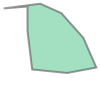

In [17]:
aoi

In [18]:
# LAT = x, LON = y

In [19]:
ds.info()

xarray.Dataset {
dimensions:
	time = 2 ;
	lat = 21 ;
	lon = 28 ;

variables:
	float32 air_temperature(time, lat, lon) ;
		air_temperature:coordinate_system = WGS84,EPSG:4326 ;
		air_temperature:description = Daily Minimum Temperature ;
		air_temperature:dimensions = lon lat time ;
		air_temperature:grid_mapping = crs ;
		air_temperature:long_name = tmmn ;
		air_temperature:standard_name = tmmn ;
		air_temperature:units = K ;
	float64 lat(lat) ;
		lat:axis = Y ;
		lat:description = latitude ;
		lat:long_name = latitude ;
		lat:standard_name = latitude ;
		lat:units = degrees_north ;
	float64 lon(lon) ;
		lon:axis = X ;
		lon:description = longitude ;
		lon:long_name = longitude ;
		lon:standard_name = longitude ;
		lon:units = degrees_east ;
	datetime64[ns] time(time) ;
		time:description = days since 1900-01-01 ;
		time:long_name = time ;
		time:standard_name = time ;

// global attributes:
	:Conventions = CF-1.6 ;
	:author = John Abatzoglou - University of Idaho, jabatzoglou@uidaho.ed

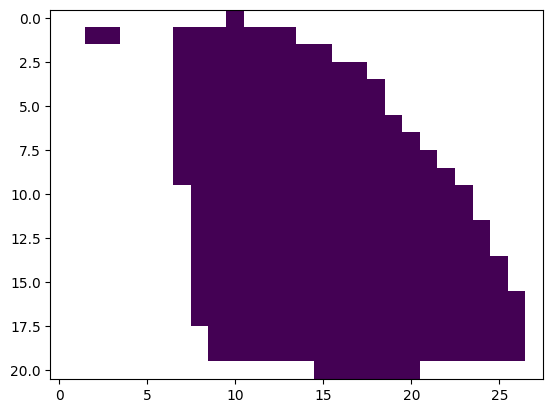

In [20]:
from shapely.geometry import Point
mask = np.empty((len(ds.lat.values), len(ds.lon.values)))
mask[:] = np.nan
for i, lat in enumerate((ds.lat.values)):
    for j, lon in enumerate((ds.lon.values)):
   
        if aoi.contains(Point(lon, lat)):
            mask[i, j] = 1
            
import matplotlib.pyplot as plt
plt.imshow(mask)

In [21]:
# Okay so we could just get allthe lat and long that are within the polygon. Then return the ds.

In [25]:
ds.info()

xarray.Dataset {
dimensions:
	time = 2 ;
	lat = 21 ;
	lon = 28 ;

variables:
	float32 air_temperature(time, lat, lon) ;
		air_temperature:coordinate_system = WGS84,EPSG:4326 ;
		air_temperature:description = Daily Minimum Temperature ;
		air_temperature:dimensions = lon lat time ;
		air_temperature:grid_mapping = crs ;
		air_temperature:long_name = tmmn ;
		air_temperature:standard_name = tmmn ;
		air_temperature:units = K ;
	float64 lat(lat) ;
		lat:axis = Y ;
		lat:description = latitude ;
		lat:long_name = latitude ;
		lat:standard_name = latitude ;
		lat:units = degrees_north ;
	float64 lon(lon) ;
		lon:axis = X ;
		lon:description = longitude ;
		lon:long_name = longitude ;
		lon:standard_name = longitude ;
		lon:units = degrees_east ;
	datetime64[ns] time(time) ;
		time:description = days since 1900-01-01 ;
		time:long_name = time ;
		time:standard_name = time ;

// global attributes:
	:Conventions = CF-1.6 ;
	:author = John Abatzoglou - University of Idaho, jabatzoglou@uidaho.ed

In [26]:
%%time 
ds_ = ds.load()

CPU times: user 1.01 s, sys: 407 ms, total: 1.42 s
Wall time: 1min 40s


In [27]:
%%time
ds_.to_netcdf("./test_dl.nc")